In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
# Data source: https://www.kaggle.com/rohan0301/unsupervised-learning-on-country-data
df=pd.read_csv('shared/Country-data.csv')
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fertility,percapita_gdp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [13]:
df.shape

(167, 10)

In [14]:
df.dropna(inplace=True)

In [15]:
data = df.iloc[:, 1:]
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data) 

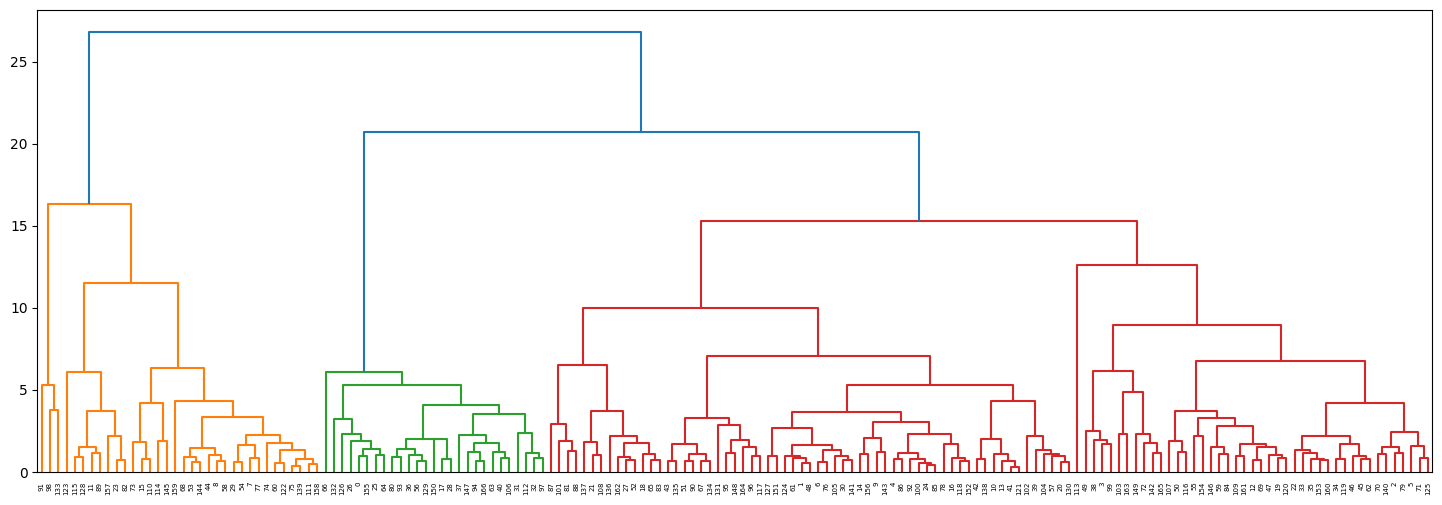

In [16]:
from scipy.cluster.hierarchy import dendrogram, linkage, cut_tree
X = data_scaled
Z = linkage(X, method='ward')
fig = plt.figure(figsize=(18, 6))
dn = dendrogram(Z)

In [17]:
print('Std', pd.DataFrame(cut_tree(Z, n_clusters=3, height=None)).value_counts().std())
pd.DataFrame(cut_tree(Z, n_clusters=3, height=None)).value_counts()

Std 43.730233629988


1    106
2     34
0     27
Name: count, dtype: int64

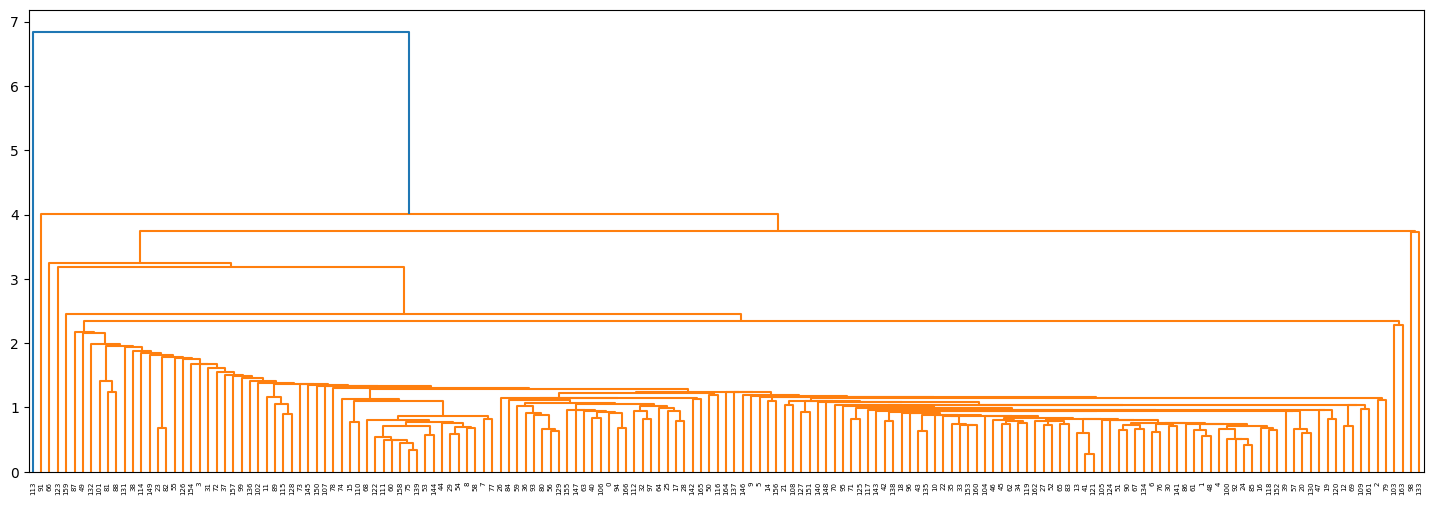

In [18]:
from scipy.cluster.hierarchy import dendrogram, linkage, cut_tree
X = data_scaled
Z = linkage(X, method='single')
fig = plt.figure(figsize=(18, 6))
dn = dendrogram(Z)

In [19]:
print('Std', pd.DataFrame(cut_tree(Z, n_clusters=3, height=None)).value_counts().std())
pd.DataFrame(cut_tree(Z, n_clusters=3, height=None)).value_counts()

Std 94.68544414709862


0    165
1      1
2      1
Name: count, dtype: int64

In [27]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
import sklearn.preprocessing as preproc

In [28]:
df = pd.read_csv('shared/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [29]:
df.Outcome.value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [30]:
# Test train split
X = df.loc[:, df.columns != 'Outcome']
X = preproc.StandardScaler().fit_transform(X) 
y = df['Outcome']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [31]:
pd.DataFrame(X, columns = df.loc[:, df.columns != 'Outcome'].columns).describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02
mean,-6.476301e-17,-9.251859e-18,1.503427e-17,1.006140e-16,-3.006854e-17,2.590520e-16,2.451743e-16,1.931325e-16
std,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00
min,-1.141852e+00,-3.783654e+00,-3.572597e+00,-1.288212e+00,-6.928906e-01,-4.060474e+00,-1.189553e+00,-1.041549e+00
25%,-8.448851e-01,-6.852363e-01,-3.673367e-01,-1.288212e+00,-6.928906e-01,-5.955785e-01,-6.889685e-01,-7.862862e-01
50%,-2.509521e-01,-1.218877e-01,1.496408e-01,1.545332e-01,-4.280622e-01,9.419788e-04,-3.001282e-01,-3.608474e-01
75%,6.399473e-01,6.057709e-01,5.632228e-01,7.190857e-01,4.120079e-01,5.847705e-01,4.662269e-01,6.602056e-01
max,3.906578e+00,2.444478e+00,2.734528e+00,4.921866e+00,6.652839e+00,4.455807e+00,5.883565e+00,4.063716e+00


In [32]:
# Fit the model
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier(n_neighbors=5)
model_knn.fit(X_train, y_train)

KNeighborsClassifier()

In [33]:
# Perform predictions, and store the results in a variable called 'pred'
pred = model_knn.predict(X_test)

In [37]:
cm = confusion_matrix(y_test, pred, labels=model_knn.classes_)

In [39]:
# Check the classification report and the confusion matrix
print(classification_report(y_true = y_test, y_pred = pred))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_knn.classes_);

              precision    recall  f1-score   support

           0       0.81      0.91      0.86        99
           1       0.79      0.62      0.69        55

    accuracy                           0.81       154
   macro avg       0.80      0.76      0.78       154
weighted avg       0.80      0.81      0.80       154



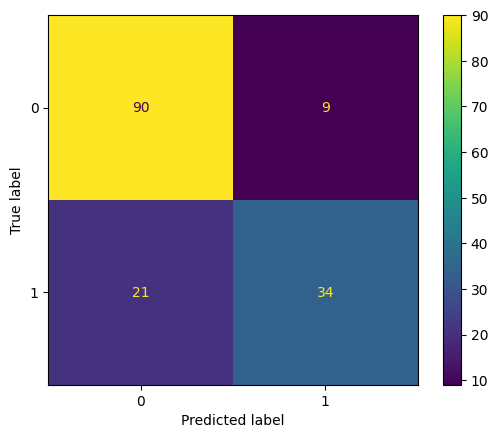

In [40]:
disp.plot()